In [ ]:
# prompt: I want to generate new excel file from existing file which contains more no. of spam messages then existing one, so you have duplicates those rows where it's mention that message in next column in same row is spam, ok and delete the next ham tagged row only, so our dataset of spam will increase by duplicating it and dataset of ham will decrease. 1st column named is v1 where it is mention either message is ham or spam and next column is v2 where message is existing.

import pandas as pd

def augment_spam_data(input_file, output_file):
    """
    Augments a dataset to increase the proportion of spam messages.

    Duplicates rows tagged as spam and removes the subsequent ham message.
    """
    try:
        df = pd.read_csv(input_file)
    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
        return

    # Check if required columns exist
    if 'v1' not in df.columns or 'v2' not in df.columns:
        print("Error: Input file must contain 'v1' and 'v2' columns.")
        return

    augmented_data = []
    i = 0
    while i < len(df):
        if df['v1'][i] == 'spam':
            augmented_data.append(df.iloc[i])  # Append the spam message
            # Duplicate the spam message if possible
            if i + 1 < len(df):
                if df['v1'][i+1] == 'ham':
                  augmented_data.append(df.iloc[i])
                  i += 1 # Skip the ham message
        elif df['v1'][i] == 'ham':
            augmented_data.append(df.iloc[i]) # keep ham messages which are not succeeding a spam message
        i += 1

    augmented_df = pd.DataFrame(augmented_data)
    augmented_df.to_csv(output_file, index=False)
    print(f"Augmented dataset saved to '{output_file}'")


# Example usage:
input_file = "/content/Niket_Dajinder.xlsx"  # Replace with your input file name
output_file = "/content/augmented_spam.csv"  # Replace with your desired output file name
augment_spam_data(input_file, output_file)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8e in position 11: invalid start byte

In [ ]:

!pip install openpyxl
import pandas as pd

def augment_spam_data(input_file, output_file):
    """
    Augments a dataset to increase the proportion of spam messages.

    Duplicates rows tagged as spam and removes the subsequent ham message.
    """
    try:
        # Use pd.read_excel to read Excel files
        df = pd.read_excel(input_file)
    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
        return

    # Check if required columns exist
    if 'v1' not in df.columns or 'v2' not in df.columns:
        print("Error: Input file must contain 'v1' and 'v2' columns.")
        return

    augmented_data = []
    i = 0
    while i < len(df):
        if df['v1'][i] == 'spam':
            augmented_data.append(df.iloc[i])  # Append the spam message
            # Duplicate the spam message if possible
            if i < len(df) - 1:
                augmented_data.append(df.iloc[i])
                i += 1
        i += 1
    augmented_df = pd.DataFrame(augmented_data)
    augmented_df.to_excel(output_file, index=False)

In [ ]:
import pandas as pd

# Load the Excel file (Make sure you upload it first in Colab)
df = pd.read_excel("/content/Niket_Dajinder.xlsx")

# Ensure column names are correct
df.columns = ['v1', 'v2']

# Find indices where v1 is 'spam'
spam_indices = df[df['v1'] == 'spam'].index.tolist()

# List to store rows to be deleted
rows_to_delete = []

# Duplicate spam rows and mark next ham for deletion
for idx in spam_indices:
    df = pd.concat([df, df.iloc[[idx]]])  # Duplicate spam row

    # Find next ham message
    if idx + 1 < len(df) and df.iloc[idx + 1]['v1'] == 'ham':
        rows_to_delete.append(idx + 1)

# Remove ham messages next to duplicated spam
df = df.drop(rows_to_delete)

# Reset index
df = df.reset_index(drop=True)

# Save the modified dataset back to Excel
df.to_excel("/content/balanced_dataset.xlsx", index=False)

print("✅ Dataset balanced successfully! New file saved as 'balanced_dataset.xlsx'")


✅ Dataset balanced successfully! New file saved as 'balanced_dataset.xlsx'


In [ ]:
import pandas as pd

# Load the upgraded Excel file
df = pd.read_excel("/content/balanced_dataset.xlsx")

# Count occurrences of each label
counts = df['v1'].value_counts()

# Display the counts
print("✅ Count of Messages in Upgraded Dataset:")
print(counts)


✅ Count of Messages in Upgraded Dataset:
v1
ham     367
spam    142
Name: count, dtype: int64


In [ ]:
import pandas as pd
import requests

# ✅ Replace with your actual API key and region
API_KEY = "FrN1fqSKqGS60hCdVaCuy46V63oF7Kp5M8dz3EJ8q3eDrkzG4jVPJQQJ99BBACYeBjFXJ3w3AAAbACOGzZGM"  # <-- Paste your Key 1 here
LOCATION = "eastus"  # Example: "westeurope", "eastus", etc.

# Microsoft Translator API endpoint
ENDPOINT = "https://api.cognitive.microsofttranslator.com/translate"

# ✅ Load your CSV file with a different encoding
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')  # Try 'ISO-8859-1' or 'utf-16'

# ✅ Inspect the first few rows of the dataframe and the column names
print(df.head())  # This will print the first few rows
print(df.columns)  # This will print the column names

# Assuming column v1 contains labels and column v2 contains the text, we just need to rename columns.
df.columns = ['v1', 'v2']

# ✅ Function to translate text to Hindi
def translate_to_hindi(text):
    if pd.isna(text):  # Handle missing values
        return ""

    params = {
        "api-version": "3.0",
        "from": "en",
        "to": "hi"
    }

    headers = {
        "Ocp-Apim-Subscription-Key": API_KEY,
        "Ocp-Apim-Subscription-Region": LOCATION,
        "Content-Type": "application/json"
    }

    body = [{"text": text}]

    response = requests.post(ENDPOINT, params=params, headers=headers, json=body)

    if response.status_code == 200:
        return response.json()[0]["translations"][0]["text"]
    else:
        return f"Error: {response.status_code}"  # Handle API errors

# ✅ Translate all rows in column 'v2' (the sentences) into Hindi
df['v2'] = df['v2'].apply(translate_to_hindi)

# ✅ Save the updated DataFrame (now only Hindi text in v2, with the original labels intact in v1)
df.to_csv("translated_dataset.csv", index=False, encoding="utf-8-sig")

print("✅ Translation completed! English removed, only Hindi retained in the 'v2' column. File saved as 'translated_dataset.csv'.")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


ValueError: Length mismatch: Expected axis has 5 elements, new values have 2 elements

In [ ]:
import pandas as pd
import requests

# ✅ Replace with your actual API key and region
API_KEY = "FrN1fqSKqGS60hCdVaCuy46V63oF7Kp5M8dz3EJ8q3eDrkzG4jVPJQQJ99BBACYeBjFXJ3w3AAAbACOGzZGM"
LOCATION = "eastus"  # Example: "westeurope"

# Microsoft Translator API endpoint
ENDPOINT = "https://api.cognitive.microsofttranslator.com/translate"

# ✅ Load CSV with correct encoding and select only needed columns
df = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')[['v1', 'v2']]

# ✅ Limit translation to only the first 501 rows
df = df.head(501)

# ✅ Function to translate text to Hindi
def translate_to_hindi(text):
    if pd.isna(text):  # Skip empty values
        return ""

    params = {
        "api-version": "3.0",
        "from": "en",
        "to": "hi"
    }

    headers = {
        "Ocp-Apim-Subscription-Key": API_KEY,
        "Ocp-Apim-Subscription-Region": LOCATION,
        "Content-Type": "application/json"
    }

    body = [{"text": text}]

    try:
        response = requests.post(ENDPOINT, params=params, headers=headers, json=body)
        response.raise_for_status()  # Raise error if request fails
        return response.json()[0]["translations"][0]["text"]
    except requests.exceptions.RequestException as e:
        return f"Error: {str(e)}"  # Handle connection issues

# ✅ Apply translation to v2 column (first 501 rows)
df['v2'] = df['v2'].apply(translate_to_hindi)

# ✅ Save the updated CSV
df.to_csv("/content/translated_501_rows.csv", index=False, encoding="utf-8-sig")

print("✅ Translation done for first 501 rows! File saved as 'translated_501_rows.csv'.")


✅ Translation done for first 501 rows! File saved as 'translated_501_rows.csv'.


In [ ]:
import pandas as pd

# ✅ Load CSV file with correct encoding
df = pd.read_csv("/content/translated_501_rows.csv", encoding="utf-8-sig")

# ✅ Ensure only needed columns are present
df = df[['v1', 'v2']]  # Keeping only 'v1' and 'v2'

# ✅ Create an empty list to store modified rows
new_data = []

i = 0
while i < len(df):
    new_data.append(df.iloc[i])  # Add the current row

    if df.iloc[i]['v1'].lower() == 'spam':
        new_data.append(df.iloc[i])  # Duplicate the spam row

        if i + 1 < len(df) and df.iloc[i + 1]['v1'].lower() == 'ham':
            i += 1  # Skip the next ham row

    i += 1  # Move to the next row

# ✅ Convert list back to DataFrame
new_df = pd.DataFrame(new_data)

# ✅ Save the updated file
new_df.to_csv("balanced_translated1.csv", index=False, encoding="utf-8-sig")

print("✅ Done! File saved as 'balanced_translated1.csv'.")


✅ Done! File saved as 'balanced_translated1.csv'.


In [ ]:
import pandas as pd

# ✅ Load all four datasets
telugu_google = pd.read_csv("/content/Telugu_google_balanced_translated.csv")  # Telugu (Google)
telugu_microsoft = pd.read_csv("/content/Telugu_microsoft_balanced_translated (1).csv")  # Telugu (Microsoft)
hindi_google = pd.read_csv("/content/balanced_dataset.csv")  # Hindi (Google)
hindi_microsoft = pd.read_csv("/content/balanced_translated1.csv")  # Hindi (Microsoft)

# ✅ Ensure column names are correct
telugu_google.columns = ['v1', 'v2']
telugu_microsoft.columns = ['v1', 'v2']
hindi_google.columns = ['v1', 'v2']
hindi_microsoft.columns = ['v1', 'v2']

# ✅ Add metadata columns for language and translation source
telugu_google['language'] = 'Telugu'
telugu_google['source'] = 'Google'

telugu_microsoft['language'] = 'Telugu'
telugu_microsoft['source'] = 'Microsoft'

hindi_google['language'] = 'Hindi'
hindi_google['source'] = 'Google'

hindi_microsoft['language'] = 'Hindi'
hindi_microsoft['source'] = 'Microsoft'

# ✅ Merge all datasets into one
merged_df = pd.concat([telugu_google, telugu_microsoft, hindi_google, hindi_microsoft], ignore_index=True)

# ✅ Remove duplicates (if any)
merged_df.drop_duplicates(subset=['v1', 'v2'], keep='first', inplace=True)

# ✅ Save the merged dataset
merged_df.to_csv("merged_dataset.csv", index=False)

# ✅ Save the merged dataset as Excel (XLSX)
merged_df.to_excel("merged_dataset.xlsx", index=False, engine='openpyxl')

# ✅ Display success message
print("Merged dataset saved successfully as both CSV and XLSX!")

# ✅ Display the first few rows
print(merged_df.head())


Merged dataset saved successfully as both CSV and XLSX!
     v1                                                 v2 language  source
0   ham  జురాంగ్ పాయింట్ వరకు వెళ్ళండి, క్రేజీ .. బుగిస...   Telugu  Google
1   ham               సరే లార్ ... జోకింగ్ వైఫ్ యు ఓని ...   Telugu  Google
2  spam  FA కప్ ఫైనల్ TKTS ను గెలుచుకోవటానికి 2 లో ఉచిత...   Telugu  Google
4   ham  అతను యుఎస్ఎఫ్ కి వెళ్తాడని నేను అనుకోను, అతను ...   Telugu  Google
5  spam  Freemsg హే అక్కడ డార్లింగ్ ఇది ఇప్పుడు 3 వారాల...   Telugu  Google


In [ ]:
import pandas as pd

# ✅ Load the merged dataset from XLSX
df = pd.read_excel("/content/merged_dataset.xlsx", engine='openpyxl')

# ✅ Count the occurrences of each category (Ham & Spam)
ham_count = (df['v1'] == 'ham').sum()
spam_count = (df['v1'] == 'spam').sum()

# ✅ Print the results
print(f"Total Ham messages: {ham_count}")
print(f"Total Spam messages: {spam_count}")


Total Ham messages: 1415
Total Spam messages: 277


In [ ]:
import pandas as pd

# ✅ Load the merged dataset from XLSX
df = pd.read_excel("/content/merged_dataset.xlsx", engine='openpyxl')

# ✅ Separate spam and ham rows based on the 'v1' column
spam_df = df[df['v1'] == 'spam']
ham_df = df[df['v1'] == 'ham']

# ✅ Duplicate the spam messages (without removing ham rows)
duplicated_spam_df = pd.concat([spam_df, spam_df], ignore_index=True)

# ✅ Concatenate the duplicated spam rows with the ham rows
final_df = pd.concat([duplicated_spam_df, ham_df], ignore_index=True)

# ✅ Shuffle the final DataFrame to mix ham and spam rows randomly
final_df = final_df.sample(frac=1).reset_index(drop=True)

# ✅ Save the final dataset to a new xlsx file
final_df.to_excel("updated_duplicated_spam_dataset.xlsx", index=False)

# ✅ Recount Ham and Spam by Language
telugu_df = final_df[final_df["language"] == "Telugu"]
hindi_df = final_df[final_df["language"] == "Hindi"]

# ✅ Count Ham & Spam in Telugu dataset
telugu_ham_count = (telugu_df['v1'] == 'ham').sum()
telugu_spam_count = (telugu_df['v1'] == 'spam').sum()

# ✅ Count Ham & Spam in Hindi dataset
hindi_ham_count = (hindi_df['v1'] == 'ham').sum()
hindi_spam_count = (hindi_df['v1'] == 'spam').sum()

# ✅ Print the results
print("Telugu Dataset (After Duplicating Spam Rows):")
print(f"  Ham: {telugu_ham_count}")
print(f"  Spam: {telugu_spam_count}\n")

print("Hindi Dataset (After Duplicating Spam Rows):")
print(f"  Ham: {hindi_ham_count}")
print(f"  Spam: {hindi_spam_count}")


Telugu Dataset (After Duplicating Spam Rows):
  Ham: 710
  Spam: 278

Hindi Dataset (After Duplicating Spam Rows):
  Ham: 705
  Spam: 276


In [ ]:
import pandas as pd

# ✅ Load the merged dataset from XLSX
df = pd.read_excel("/content/updated_duplicated_spam_dataset.xlsx", engine='openpyxl')

# ✅ Count the occurrences of each category (Ham & Spam)
ham_count = (df['v1'] == 'ham').sum()
spam_count = (df['v1'] == 'spam').sum()

# ✅ Print the results
print(f"Total Ham messages: {ham_count}")
print(f"Total Spam messages: {spam_count}")


Total Ham messages: 1415
Total Spam messages: 554


Dataset Preview (First 5 Rows):
    v1                                                 v2 language     source
0  ham          जोस पूछते हैं कि क्या आप मिलना चाहते हैं?    Hindi     Google
1  ham  ఆయన అక్కడే ఉన్నారు. మీరు అతడికి ఫోన్ చేసి కలుస...   Telugu  Microsoft
2  ham  ఉపాధ్యాయుడి కంటే జీవితం చాలా కఠినమైనది ... Bco...   Telugu     Google
3  ham  बहुत खूब। आप ठीक कह रहे हैं! मुझे ऐसा करने का ...    Hindi     Google
4  ham               आप अपनी बाइक की सवारी कब कर रहे हैं?    Hindi     Google

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   v1        1969 non-null   object
 1   v2        1969 non-null   object
 2   language  1969 non-null   object
 3   source    1969 non-null   object
dtypes: object(4)
memory usage: 61.7+ KB
None

Spam and Ham Count per Language:
v1        ham  spam
language           
Hindi     705   276
Telu

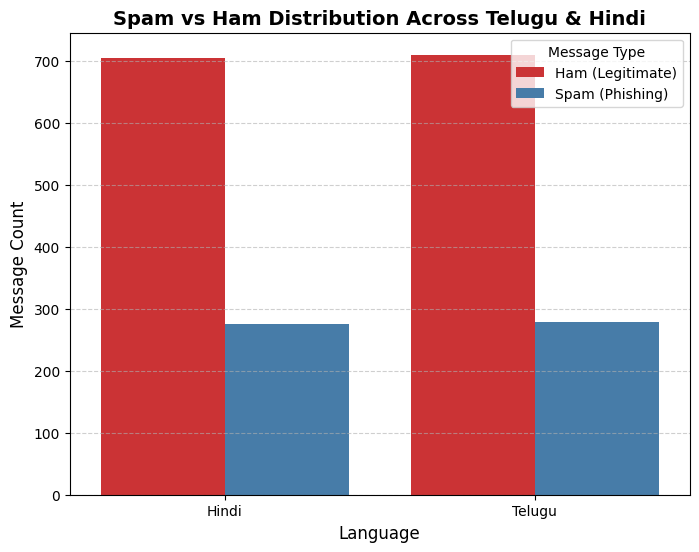


Spam and Ham Count per Translation Source:
v1         ham  spam
source              
Google     720   276
Microsoft  695   278


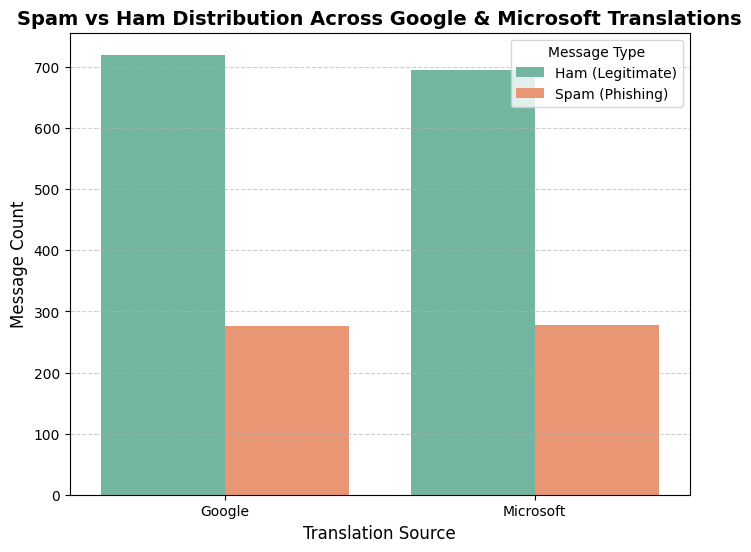

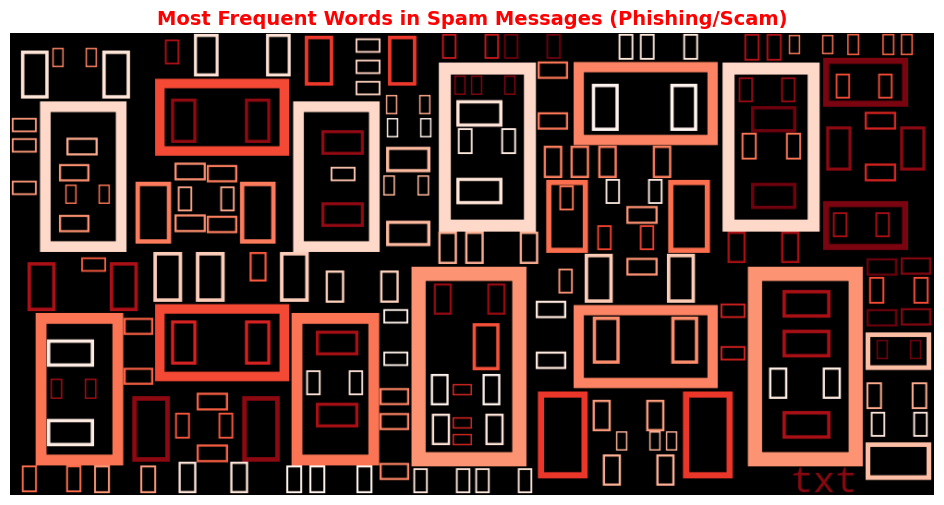

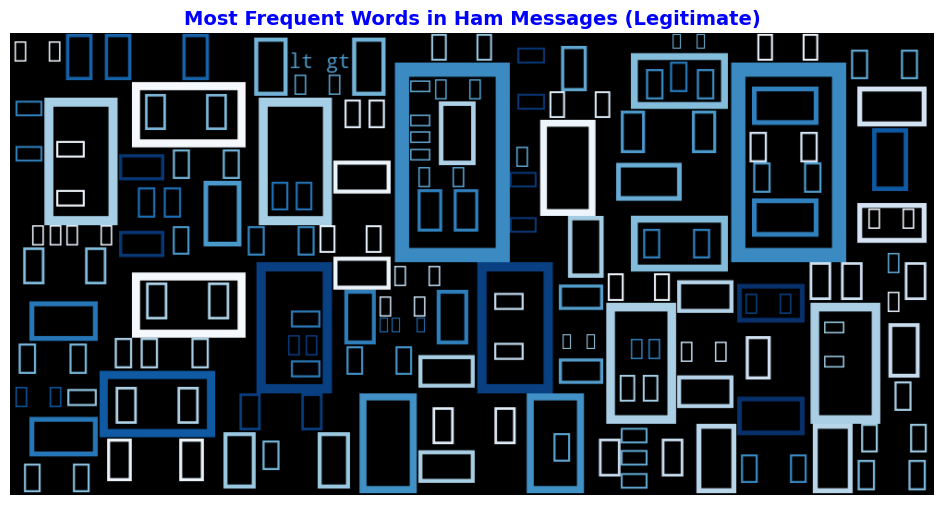

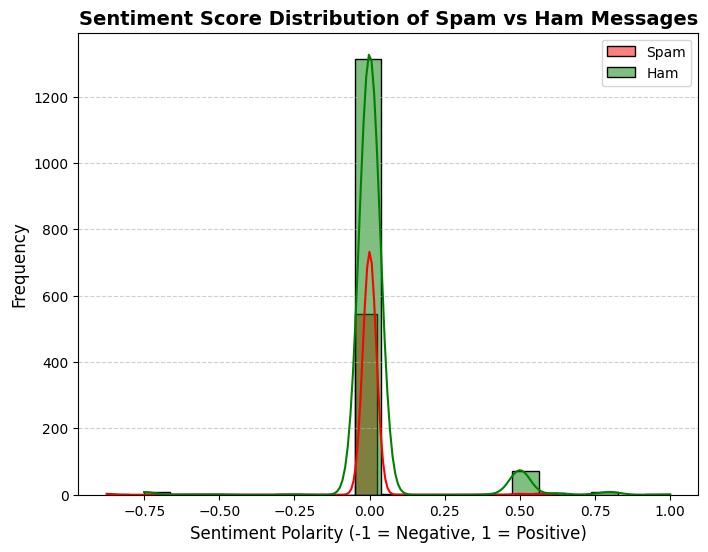

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# Load the merged XLSX dataset
file_path = "/content/updated_duplicated_spam_dataset.xlsx"
df = pd.read_excel(file_path)

# ------------------------- Basic Data Exploration -------------------------

# Display first few rows to understand the structure
print("Dataset Preview (First 5 Rows):")
print(df.head())

# Check the structure of the dataset (column names, data types, missing values)
print("\nDataset Information:")
print(df.info())

# ------------------------- Spam & Ham Count by Language -------------------------

# Count the number of Spam and Ham messages for each language (Telugu/Hindi)
language_spam_count = df.groupby(['language', 'v1']).size().unstack(fill_value=0)

# Display the Spam/Ham count table for each language
print("\nSpam and Ham Count per Language:")
print(language_spam_count)

# Plot Spam and Ham distribution across Telugu and Hindi
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='language', hue='v1', palette='Set1')

# Add detailed labels
plt.title("Spam vs Ham Distribution Across Telugu & Hindi", fontsize=14, fontweight='bold')
plt.xlabel("Language", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.legend(title="Message Type", labels=["Ham (Legitimate)", "Spam (Phishing)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# ------------------------- Spam & Ham Count by Translation Source -------------------------

# Count Spam and Ham messages for both Google and Microsoft translations
source_spam_count = df.groupby(['source', 'v1']).size().unstack(fill_value=0)

# Display the Spam/Ham count table for each translation source
print("\nSpam and Ham Count per Translation Source:")
print(source_spam_count)

# Plot Spam and Ham distribution across Google and Microsoft Translations
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='source', hue='v1', palette='Set2')

# Add detailed labels
plt.title("Spam vs Ham Distribution Across Google & Microsoft Translations", fontsize=14, fontweight='bold')
plt.xlabel("Translation Source", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.legend(title="Message Type", labels=["Ham (Legitimate)", "Spam (Phishing)"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# ------------------------- Word Cloud Visualization for Spam Messages -------------------------

# Combine all Spam messages into one large text string for analysis
spam_text = " ".join(df[df['v1'] == 'spam']['v2'].dropna())

# Generate a word cloud for spam messages
wordcloud_spam = WordCloud(
    width=1000, height=500,
    background_color='black',
    colormap='Reds',
    max_words=100,  # Limit to 100 most frequent words
    contour_color='white',
    contour_width=2
).generate(spam_text)

# Plot the Spam word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')

# Add a title to make the graph clear
plt.title('Most Frequent Words in Spam Messages (Phishing/Scam)', fontsize=14, fontweight='bold', color='red')
plt.show()

# ------------------------- Word Cloud Visualization for Ham Messages -------------------------

# Combine all Ham messages into one large text string for analysis
ham_text = " ".join(df[df['v1'] == 'ham']['v2'].dropna())

# Generate a word cloud for ham messages
wordcloud_ham = WordCloud(
    width=1000, height=500,
    background_color='black',
    colormap='Blues',
    max_words=100,  # Limit to 100 most frequent words
    contour_color='white',
    contour_width=2
).generate(ham_text)

# Plot the Ham word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')

# Add a title to make the graph clear
plt.title('Most Frequent Words in Ham Messages (Legitimate)', fontsize=14, fontweight='bold', color='blue')
plt.show()

# ------------------------- Sentiment Analysis on Spam & Ham Messages -------------------------

# Apply sentiment analysis using TextBlob
df['sentiment'] = df['v2'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution for Spam vs Ham messages
plt.figure(figsize=(8, 6))

sns.histplot(df[df['v1'] == 'spam']['sentiment'], kde=True, color='red', label='Spam', bins=20)
sns.histplot(df[df['v1'] == 'ham']['sentiment'], kde=True, color='green', label='Ham', bins=20)

# Add labels
plt.title("Sentiment Score Distribution of Spam vs Ham Messages", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment Polarity (-1 = Negative, 1 = Positive)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# ** Text Preprocessing & TF-IDF Feature Extraction **

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords for Hindi and Telugu
nltk.download("stopwords")
hindi_stopwords = set(stopwords.words("english"))  # Replace with actual Hindi stopwords
# Telugu stopwords need to be manually added or sourced

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = text.split()

    # Remove stopwords (Assuming English for now, extend with Hindi & Telugu lists)
    tokens = [word for word in tokens if word not in hindi_stopwords]

    return " ".join(tokens)

# Load the dataset
file_path = "/content/updated_duplicated_spam_dataset.xlsx"  # Update with actual file path
df = pd.read_excel(file_path)

# Apply preprocessing
df['cleaned_text'] = df['v2'].astype(str).apply(preprocess_text)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Save processed dataset
df.to_excel("preprocessed_dataset.xlsx", index=False)

print("✅ Text preprocessing and TF-IDF feature extraction completed!")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Text preprocessing and TF-IDF feature extraction completed!


In [ ]:
df = pd.read_excel("/content/preprocessed_dataset.xlsx")
df.head()

,v1,v2,language,source,cleaned_text
0,ham,जोस पूछते हैं कि क्या आप मिलना चाहते हैं?,Hindi,Google,जस पछत ह क कय आप मलन चहत ह
1,ham,ఆయన అక్కడే ఉన్నారు. మీరు అతడికి ఫోన్ చేసి కలుస...,Telugu,Microsoft,ఆయన అకకడ ఉననర మర అతడక ఫన చస కలసతర
2,ham,ఉపాధ్యాయుడి కంటే జీవితం చాలా కఠినమైనది ... Bco...,Telugu,Google,ఉపధయయడ కట జవత చల కఠనమనద bcoz ఉపధయయడ పఠ బధసతడ a...
3,ham,बहुत खूब। आप ठीक कह रहे हैं! मुझे ऐसा करने का ...,Hindi,Google,बहत खब आप ठक कह रह ह मझ ऐस करन क मतलब नह थ मझ ...
4,ham,आप अपनी बाइक की सवारी कब कर रहे हैं?,Hindi,Google,आप अपन बइक क सवर कब कर रह ह


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Load the preprocessed dataset
df = pd.read_excel("/content/preprocessed_dataset.xlsx")

# Ensure we use the cleaned text column
X = df["cleaned_text"]  # Features (text data)
y = df["v1"]  # Labels (ham/spam)

# Convert text into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X_tfidf = vectorizer.fit_transform(X)

# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.3, random_state=42, stratify=y)

# Further split temp into validation (15%) and testing (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Save the TF-IDF vectorizer and dataset splits
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
joblib.dump((X_train, X_val, X_test, y_train, y_val, y_test), "train_val_test_data.pkl")

print("✅ TF-IDF transformation complete! Data split into 70% training, 15% validation, and 15% testing.")


✅ TF-IDF transformation complete! Data split into 70% training, 15% validation, and 15% testing.


# **Logistic Regression**

In [ ]:
import os

file_path = "/content/train_val_test_data.pkl"
print(f"File Size: {os.path.getsize(file_path)} bytes")


File Size: 352058 bytes


In [ ]:
with open("/content/train_val_test_data.pkl", "rb") as f:
    content = f.read(100)  # Read first 100 bytes
    print(content)


b'\x80\x04\x95$\x01\x00\x00\x00\x00\x00\x00(\x8c\x11scipy.sparse._csr\x94\x8c\ncsr_matrix\x94\x93\x94)\x81\x94}\x94(\x8c\x06_shape\x94Mb\x05M\x1d\x13\x86\x94\x8c\x08maxprint\x94K2\x8c\x07indices\x94\x8c\x13jobli'


Doing Again

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
file_path = "/content/preprocessed_dataset.xlsx"
df = pd.read_excel(file_path)

# Ensure dataset has the necessary columns
if 'cleaned_text' not in df.columns or 'v1' not in df.columns:
    raise ValueError("Dataset is missing required columns 'cleaned_text' or 'v1'!")

# Define features (X) and labels (y)
X = df["cleaned_text"]
y = df["v1"]  # Assuming 'v1' is the spam/ham label column

# Split the dataset (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Confirm sizes
print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")


Train: 1378, Validation: 295, Test: 296


In [ ]:
import pickle

data = {
    "X_train": X_train, "y_train": y_train,
    "X_val": X_val, "y_val": y_val,
    "X_test": X_test, "y_test": y_test
}

# Save properly
with open("/content/train_val_test_data.pkl", "wb") as f:
    pickle.dump(data, f)

print("✅ Successfully re-saved the dataset!")


✅ Successfully re-saved the dataset!


In [ ]:
with open("/content/train_val_test_data.pkl", "rb") as f:
    data = pickle.load(f)

# Print dataset size
print("✅ Successfully loaded dataset!")
print(f"Train: {len(data['X_train'])}, Validation: {len(data['X_val'])}, Test: {len(data['X_test'])}")


✅ Successfully loaded dataset!
Train: 1378, Validation: 295, Test: 296


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ Load the preprocessed dataset
with open("train_val_test_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]

# ✅ Initialize and fit TF-IDF Vectorizer on training data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 most important ones
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# ✅ Save the transformed data and vectorizer
with open("tfidf_vectorized_data.pkl", "wb") as f:
    pickle.dump({
        "X_train": X_train_tfidf, "y_train": y_train,
        "X_val": X_val_tfidf, "y_val": y_val,
        "X_test": X_test_tfidf, "y_test": y_test
    }, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("✅ TF-IDF Vectorization completed and saved!")


✅ TF-IDF Vectorization completed and saved!


In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load TF-IDF Vectorizer & Data
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("train_val_test_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train, y_train = data["X_train_tfidf"], data["y_train"]
X_val, y_val = data["X_val_tfidf"], data["y_val"]
X_test, y_test = data["X_test_tfidf"], data["y_test"]

# Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, pos_label="spam")
    recall = recall_score(y_val, y_pred, pos_label="spam")
    f1 = f1_score(y_val, y_pred, pos_label="spam")

    results.append([name, accuracy, precision, recall, f1])

    # Save model
    with open(f"{name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df.sort_values(by="F1-Score", ascending=False))

# Save results
results_df.to_csv("model_performance.csv", index=False)


KeyError: 'X_train_tfidf'

In [ ]:
import pickle

# Load the dataset
with open("train_val_test_data.pkl", "rb") as f:
    data = pickle.load(f)

# Print available keys
print("Keys in the pickle file:", data.keys())


Keys in the pickle file: dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])


In [ ]:
import pickle

# Load TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Load Train, Validation, and Test sets
with open("train_val_test_data.pkl", "rb") as f:
    data = pickle.load(f)

# Apply TF-IDF transformation
X_train_tfidf = tfidf_vectorizer.transform(data["X_train"])
X_val_tfidf = tfidf_vectorizer.transform(data["X_val"])
X_test_tfidf = tfidf_vectorizer.transform(data["X_test"])

# Save transformed data back into a new pickle file
tfidf_data = {
    "X_train_tfidf": X_train_tfidf, "y_train": data["y_train"],
    "X_val_tfidf": X_val_tfidf, "y_val": data["y_val"],
    "X_test_tfidf": X_test_tfidf, "y_test": data["y_test"]
}

with open("train_val_test_tfidf.pkl", "wb") as f:
    pickle.dump(tfidf_data, f)

print("✅ Successfully applied TF-IDF and saved new dataset!")


✅ Successfully applied TF-IDF and saved new dataset!


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load the transformed data
with open("train_val_test_tfidf.pkl", "rb") as f:
    tfidf_data = pickle.load(f)

# Split the data into features and labels
X_train = tfidf_data["X_train_tfidf"]
y_train = tfidf_data["y_train"]
X_val = tfidf_data["X_val_tfidf"]
y_val = tfidf_data["y_val"]
X_test = tfidf_data["X_test_tfidf"]
y_test = tfidf_data["y_test"]


In [ ]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Validation Set Evaluation:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.95       212
        spam       0.98      0.77      0.86        83

    accuracy                           0.93       295
   macro avg       0.95      0.88      0.91       295
weighted avg       0.94      0.93      0.93       295

Test Set Evaluation:
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       213
        spam       0.97      0.72      0.83        83

    accuracy                           0.92       296
   macro avg       0.93      0.86      0.89       296
weighted avg       0.92      0.92      0.91       296



In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for logistic regression
param_grid = {'C': [0.1, 1, 10, 100]}

# Perform grid search to find the best parameter
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
print("Test Set Evaluation with Best Model:")
print(classification_report(y_test, y_test_pred))


Test Set Evaluation with Best Model:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       213
        spam       0.98      0.98      0.98        83

    accuracy                           0.99       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.99      0.99      0.99       296



In [ ]:
# Save the trained model
with open("text_classification_model.pkl", "wb") as f:
    pickle.dump(model, f)

# If using the best model after tuning:
# with open("best_text_classification_model.pkl", "wb") as f:
#     pickle.dump(best_model, f)


In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the transformed data
with open("/content/train_val_test_tfidf.pkl", "rb") as f:
    tfidf_data = pickle.load(f)

# Split the data into features and labels
X_train = tfidf_data["X_train_tfidf"]
y_train = tfidf_data["y_train"]
X_val = tfidf_data["X_val_tfidf"]
y_val = tfidf_data["y_val"]
X_test = tfidf_data["X_test_tfidf"]
y_test = tfidf_data["y_test"]

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

# Save the trained model to a pickle file
with open("text_classification_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model training complete and saved as text_classification_model.pkl!")


Validation Set Evaluation:
              precision    recall  f1-score   support

         ham       0.92      1.00      0.95       212
        spam       0.98      0.77      0.86        83

    accuracy                           0.93       295
   macro avg       0.95      0.88      0.91       295
weighted avg       0.94      0.93      0.93       295

Test Set Evaluation:
              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       213
        spam       0.97      0.72      0.83        83

    accuracy                           0.92       296
   macro avg       0.93      0.86      0.89       296
weighted avg       0.92      0.92      0.91       296

✅ Model training complete and saved as text_classification_model.pkl!


In [ ]:
# Load the saved model
with open("text_classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# Assuming you have new text data to predict
new_text_data = ["जोस पूछते हैं कि क्या आप मिलना चाहते हैं?"]

# You would need to apply the same TF-IDF transformation to the new data
new_text_tfidf = tfidf_vectorizer.transform(new_text_data)

# Make predictions
predictions = model.predict(new_text_tfidf)

# Output the predictions
print(predictions)


['ham']


In [ ]:

with open("text_classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# Assuming you have new text data to predict
new_text_data = ["बधाई! Nokia 3650 वीडियो कैमरा फोन आपका कॉल है 09066382422 कॉल COST COST 150PPM AVE कॉल 3mins मोबाइल्स से अलग -अलग हैं 16+ क्लोज 300603 पोस्ट BCM4284 LDN WC1N3XX"]

# You would need to apply the same TF-IDF transformation to the new data
new_text_tfidf = tfidf_vectorizer.transform(new_text_data)

# Make predictions
predictions = model.predict(new_text_tfidf)

# Output the predictions
print(predictions)


['ham']


In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       213
        spam       0.98      0.98      0.98        83

    accuracy                           0.99       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.99      0.99      0.99       296



In [ ]:

with open("text_classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# Assuming you have new text data to predict
new_text_data = ["మీ మొబైల్ 11 నెలలు లేదా అంతకంటే ఎక్కువ ఉందా?కెమెరాతో తాజా కలర్ మొబైల్‌లకు ఉచితంగా అప్‌డేట్ చేయడానికి u r అర్హత ఉంది!08002986030 లో మొబైల్ నవీకరణ CO కి ఉచితంగా కాల్ చేయండి"]

# You would need to apply the same TF-IDF transformation to the new data
new_text_tfidf = tfidf_vectorizer.transform(new_text_data)

# Make predictions
predictions = model.predict(new_text_tfidf)

# Output the predictions
print(predictions)


['ham']
